# Example of Using FrodoBots Dataset

## Introduction
FrodoBots dataset classifies data according to the robot id and session id. Whenever the driver drives a robot, the system will generate a session id to record the data. The data content is as follows

1. **Control data**
- control_`session_id`.csv
2. **GPS data**
- gps_streams_`session_id`.csv
3. **IMU**
- imu_streams_`session_id`.csv
4. **Front camera video**
- front_`session_id`.mp4
- front_`session_id`.csv
5. **Rear camera video**
- rear_`session_id`.mp4
- rear_`session_id`.csv
6. **Microhone**
- mic_`session_id`.mp4
7. **Speaker**
- spk_`session_id`_`timestamp`.mp4

Before executing this program, you can download the [sample](https://frodobots-1k.s3.ap-southeast-1.amazonaws.com/frodobots-1k_20230907_getting-started.zip) first. And specify the robot id and session id to be processed.

In [1]:
dataset_dir = './frodobots-1k_20230907_getting-started'
bot_id = 'frodobot2e6388'
session_id = '20230522142406'

## Control data

In [2]:
import pandas as pd
control = pd.read_csv(dataset_dir + '/' + bot_id + '/' + session_id + '/control_' + session_id + '.csv')
control.head()

speed  angular  rpm_1  rpm_2  rpm_3  rpm_4     timestamp
0  0.000000      0.0      0      0      0      0  1.684762e+09
1  0.195882      0.0      0      0      0      0  1.684762e+09
2  0.432353      0.0      0      0      0      0  1.684762e+09
3  0.217059      0.0      0      0      0      0  1.684762e+09
4  0.379412      0.0      0      0      0      0  1.684762e+09

### GPS data

In [3]:
import json

gps = pd.read_csv(dataset_dir + '/' + bot_id + '/' + session_id + '/gps_streams_' + session_id + '.csv')

gps['payload'] = gps['payload'].apply(json.loads)

payload_keys = ['timestamp', 'latitude', 'speed_in_mh', 'longitude']
for key in payload_keys:
    gps[key] = gps['payload'].apply(lambda x: x.get(key, {}))

gps.drop(columns=['payload'], inplace=True)
gps.drop(columns=['device_ref_id'], inplace=True)
gps.head()


timestamp            latitude speed_in_mh              longitude
0  1684761850.317    51.5443344116211           0    -0.0125215332955122
1  1684761852.949   51.54433059692383           0  -0.012519449926912785
2    1684761854.4   51.54432678222656           0  -0.012513366527855396
3  1684761857.149  51.544315338134766           0   -0.01250234991312027
4  1684761859.347  51.544315338134766           0    -0.0125002833083272

### IMU data

In [4]:
imu_data = pd.read_csv(dataset_dir + '/' + bot_id + '/' + session_id + '/imu_streams_' + session_id + '.csv')

imu_data_payload = imu_data['payload']

compass = pd.DataFrame(columns=['x','y','z', 'timestamp'])
accelerometer = pd.DataFrame(columns=['x','y','z', 'timestamp'])
gyroscope = pd.DataFrame(columns=['x','y','z', 'timestamp'])

for imu_data_payload_row in imu_data_payload[:10]:

  imu_data_parsed = json.loads(imu_data_payload_row)

  for compass_row in imu_data_parsed['compass']:
    compass.loc[len(compass)] = compass_row

  for gyroscope_row in imu_data_parsed['gyroscope']:
    gyroscope.loc[len(gyroscope)] = gyroscope_row

  for accelerometer_row in imu_data_parsed['accelerometer']:
    accelerometer.loc[len(accelerometer)] = accelerometer_row


In [5]:
accelerometer.head()

x                    y                  z       timestamp
0  -1.1920000314712524  0.15700000524520874  0.518999993801117  1684761847.116
1  -1.1920000314712524  0.15700000524520874  0.518999993801117  1684761847.124
2  -1.1920000314712524  0.15700000524520874  0.518999993801117  1684761847.132
3  -1.1920000314712524  0.15700000524520874  0.518999993801117   1684761847.14
4  -1.1920000314712524  0.15700000524520874  0.518999993801117  1684761847.148

In [6]:
gyroscope.head()

x                   y                     z       timestamp
0  4.67199993133545  -4.229000091552734  -0.35100001096725464  1684761849.305
1  4.67199993133545  -4.229000091552734  -0.35100001096725464  1684761852.507
2  4.67199993133545  -4.229000091552734  -0.35100001096725464   1684761854.36
3  4.67199993133545  -4.229000091552734  -0.35100001096725464   1684761856.61
4  4.67199993133545  -4.229000091552734  -0.35100001096725464  1684761859.304

In [7]:
compass.head()

x      y      z       timestamp
0  -10057  21760  26735  1684761849.307
1  -10057  21760  26735  1684761852.509
2  -10057  21760  26735  1684761854.362
3  -10057  21760  26735  1684761856.613
4  -10057  21760  26735  1684761859.307

### Front camera video

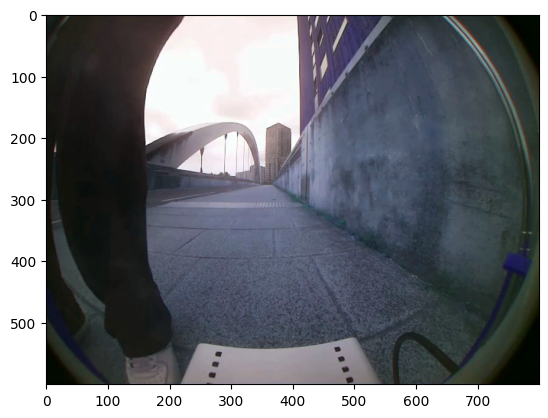

In [8]:
import cv2
from matplotlib import pyplot as plt

front_camera = dataset_dir + '/' + bot_id + '/' + session_id + '/front_' + session_id + '.mp4'
capture = cv2.VideoCapture(front_camera)

# Extract five frames
frame_id = 5.0
while capture.isOpened():
  ret, frame = capture.read()
  if capture.get(cv2.CAP_PROP_POS_FRAMES) == (frame_id-1) and ret:
    plt.imshow(frame)
    break;

In [9]:
# Get timestamp of each frame
front_camera_df = pd.read_csv(dataset_dir + '/' + bot_id + '/' + session_id + '/front_' + session_id + '.csv')
front_camera_df.head()

frame_id     timestamp
0         1  1.684762e+09
1         2  1.684762e+09
2         3  1.684762e+09
3         4  1.684762e+09
4         5  1.684762e+09

### Rear camera video

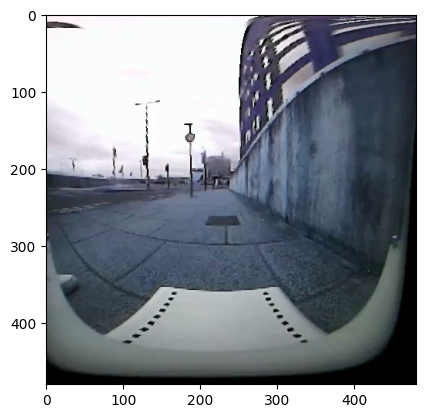

In [10]:
import cv2
from matplotlib import pyplot as plt

rear_camera = dataset_dir + '/' + bot_id + '/' + session_id + '/rear_' + session_id + '.mp4'
capture = cv2.VideoCapture(rear_camera)

# Extract five frames
frame_id = 5.0
while capture.isOpened():
  ret, frame = capture.read()
  if capture.get(cv2.CAP_PROP_POS_FRAMES) == (frame_id-1) and ret:
    plt.imshow(frame)
    break;

In [11]:
# Get timestamp of each frame
front_camera_df = pd.read_csv(dataset_dir + '/' + bot_id + '/' + session_id + '/rear_' + session_id + '.csv')
front_camera_df.head()

frame_id     timestamp
0         1  1.684762e+09
1         2  1.684762e+09
2         3  1.684762e+09
3         4  1.684762e+09
4         5  1.684762e+09